# Load dataset

In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('data/bank-full.csv', sep= ";")

In [8]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Dataset Exploration

### Check Null/Missing Values

In [13]:
# get null value count in dataset
null_values = data.isnull().sum()

In [14]:
null_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Check Duplicate values

In [17]:
# check duplicate values(row) in dataset
duplicates = data.duplicated().sum()

In [18]:
duplicates

0

### Basic Dataset Information

In [31]:
# Get basic info about dataset
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [32]:
# Display a summary of numerical columns
print("Summary Statistics:")
summary = data.describe()
summary

Summary Statistics:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Understand the Target Variable

In [37]:
# Analyze the target variable if there is class unbalance problem
print("Class Distribution:")
print(data["y"].value_counts())

Class Distribution:
y
no     39922
yes     5289
Name: count, dtype: int64


In [39]:
# check target variables as a percentage
print(data["y"].value_counts() / len(data) * 100)

y
no     88.30152
yes    11.69848
Name: count, dtype: float64


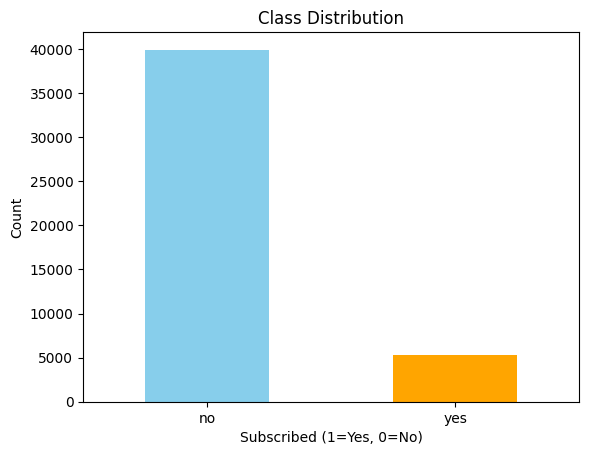

In [40]:
# Visualize class distribution
import matplotlib.pyplot as plt

data[target_col].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Subscribed (1=Yes, 0=No)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

### Attribute Types and Meta-Information

In [41]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(exclude=['object']).columns

In [47]:
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Numerical Columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


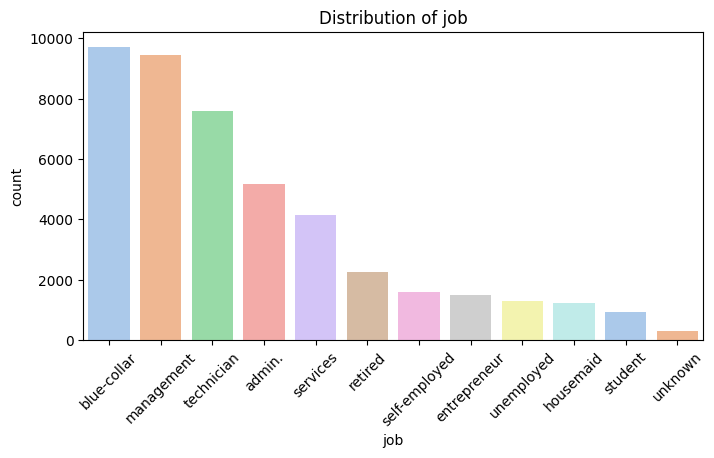

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


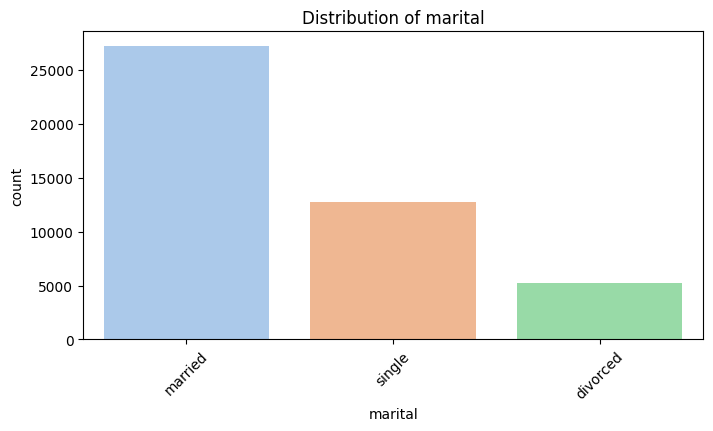

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


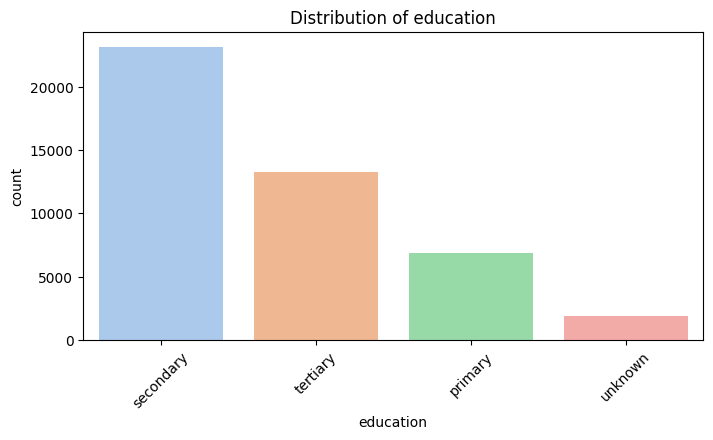

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


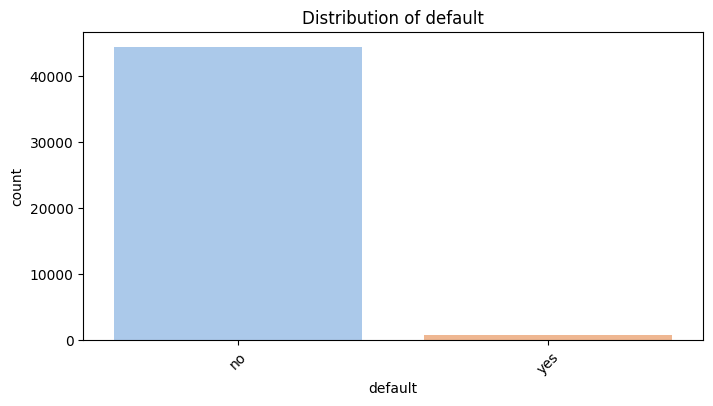

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


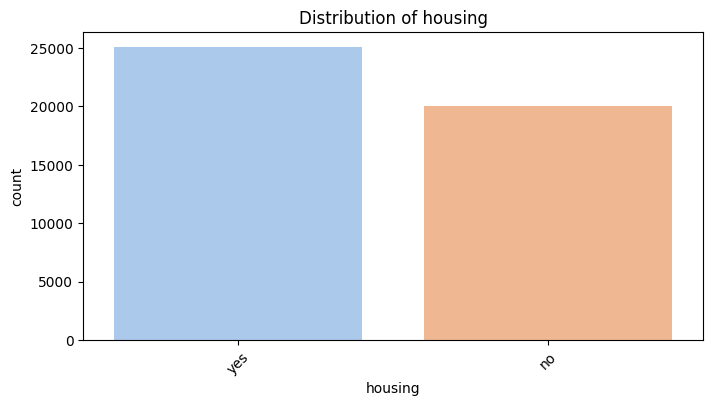

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


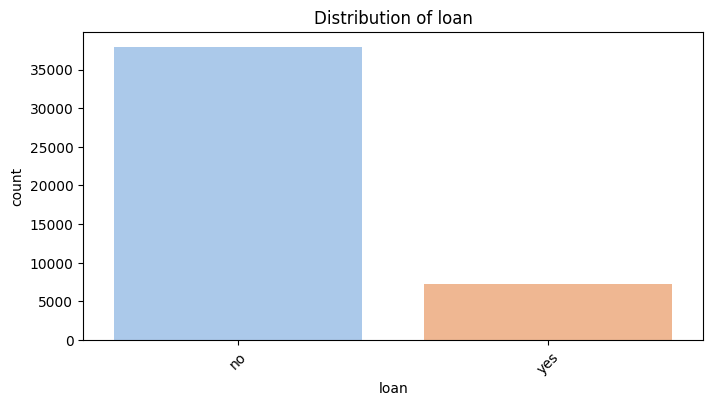

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


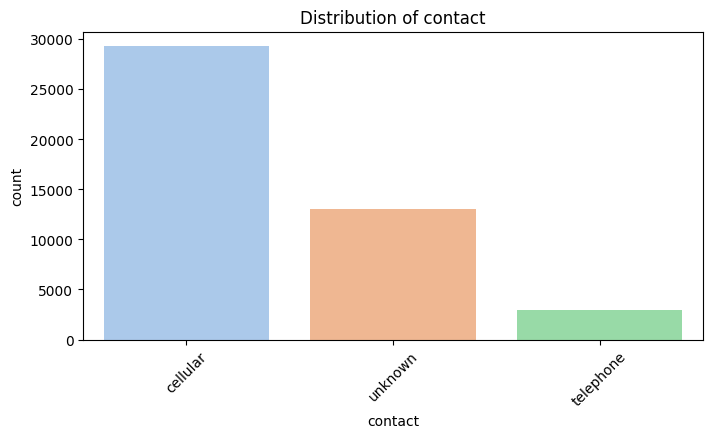

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


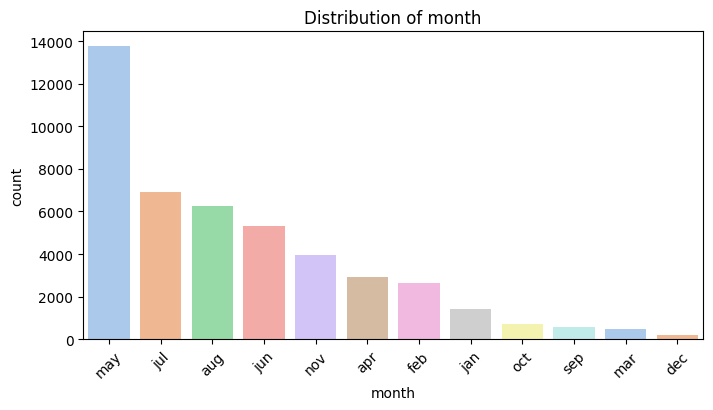

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


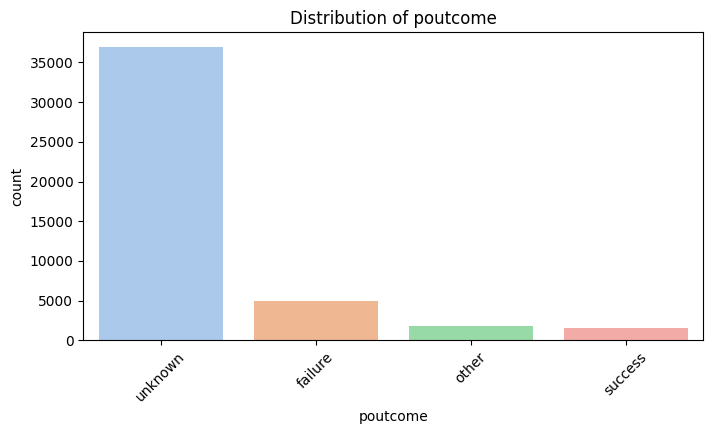

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


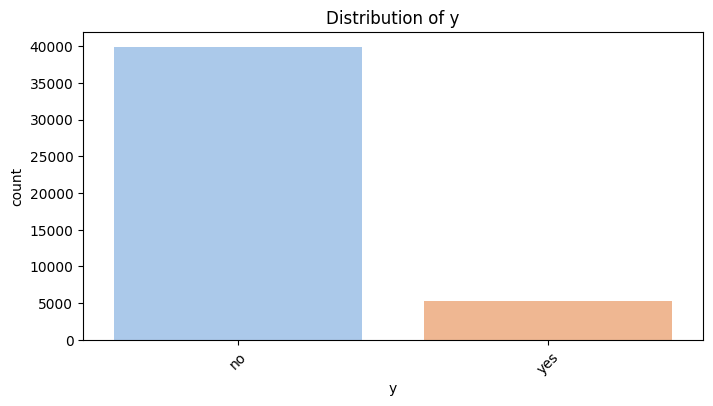

In [54]:
# Visualize distributions of categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [48]:
# Value counts for each categorical column
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(data[col].value_counts())


Value Counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Value Counts for marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Value Counts for education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Value Counts for default:
default
no     44396
yes      815
Name: count, dtype: int64

Value Counts for housing:
housing
yes    25130
no     20081
Name: count, dtype: int64

Value Counts for loan:
loan
no     37967
yes     7244
Name: count, dtype: int64

Value Counts for contact:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

Value Counts for month:
month
may    13766
jul     68

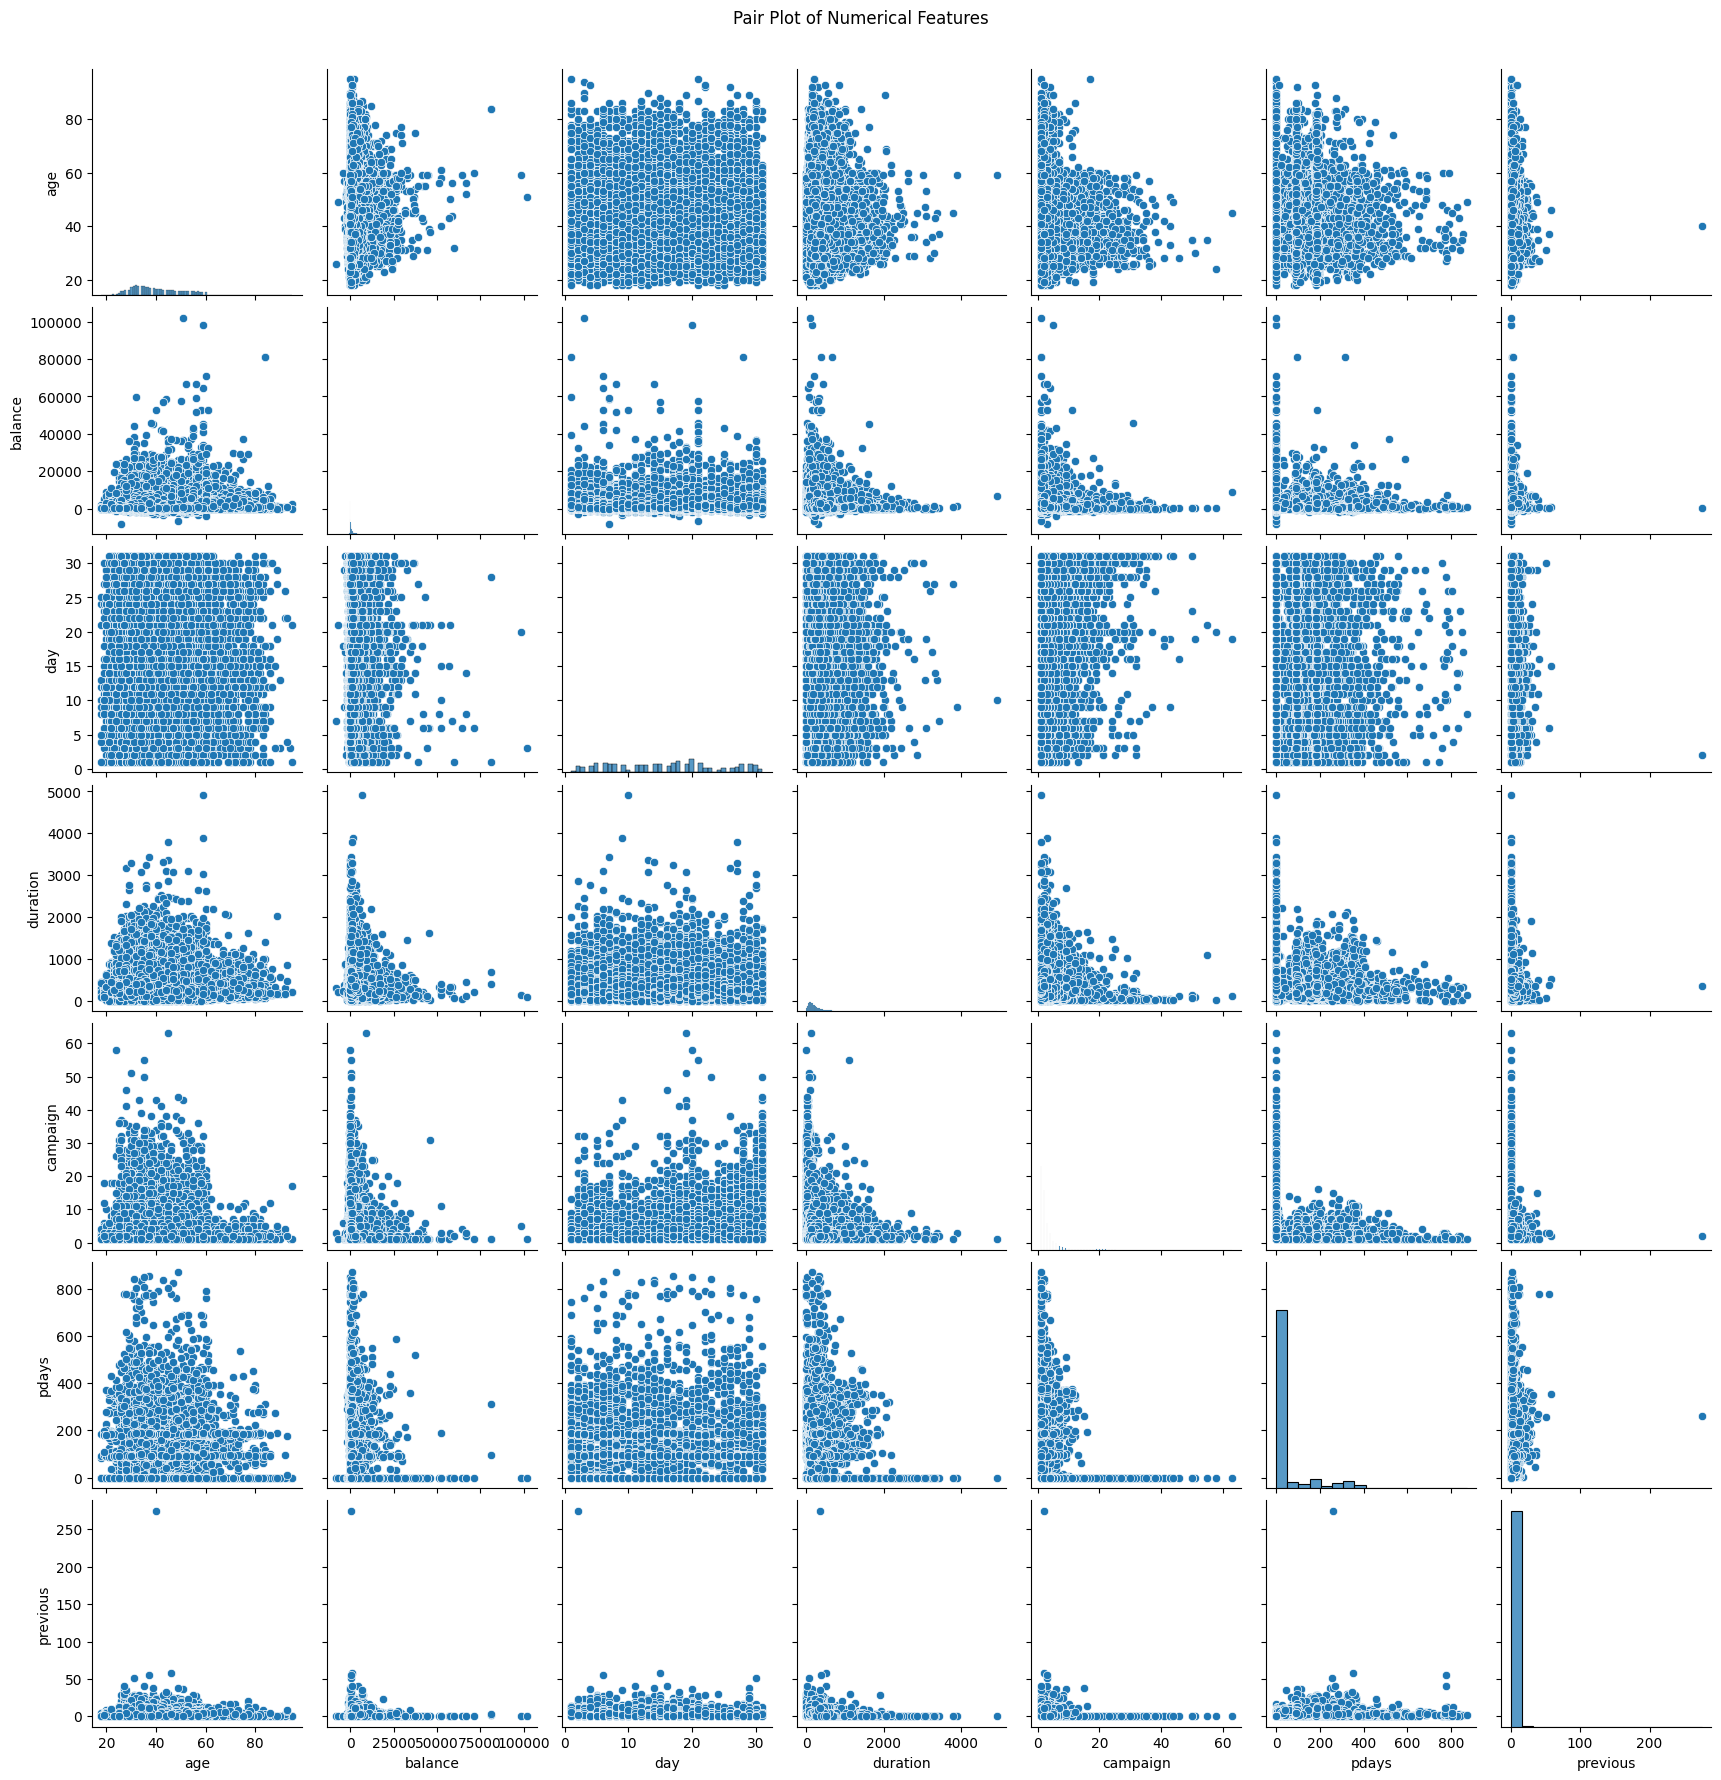

In [55]:
# Pairplot for numerical features
sns.pairplot(data[numerical_cols])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


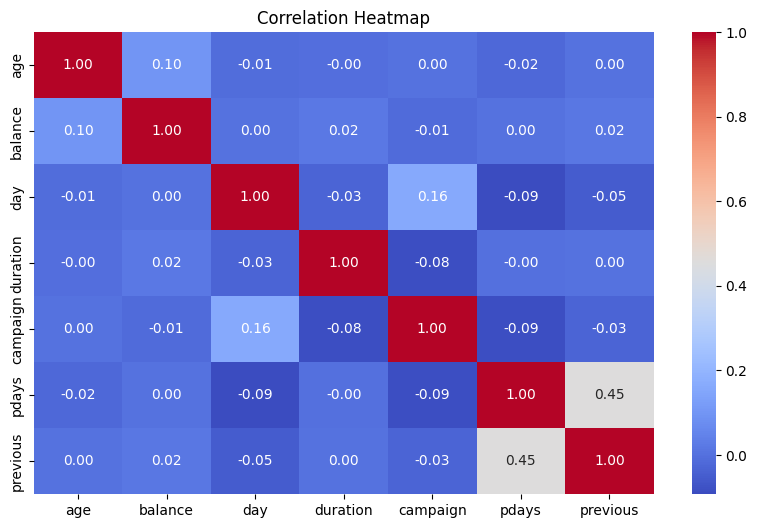

In [56]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = data[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


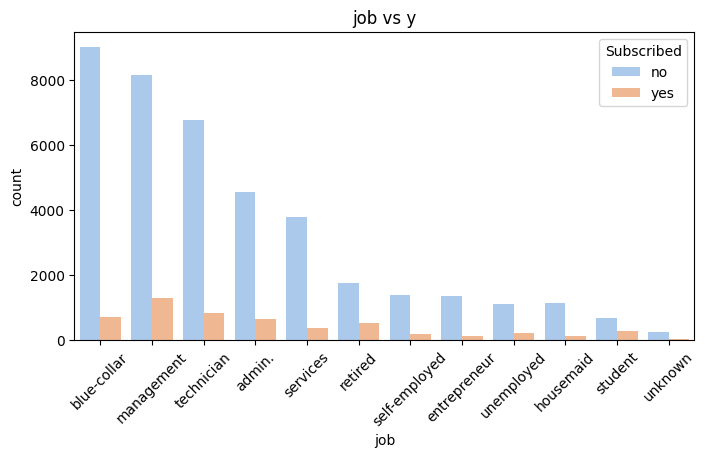

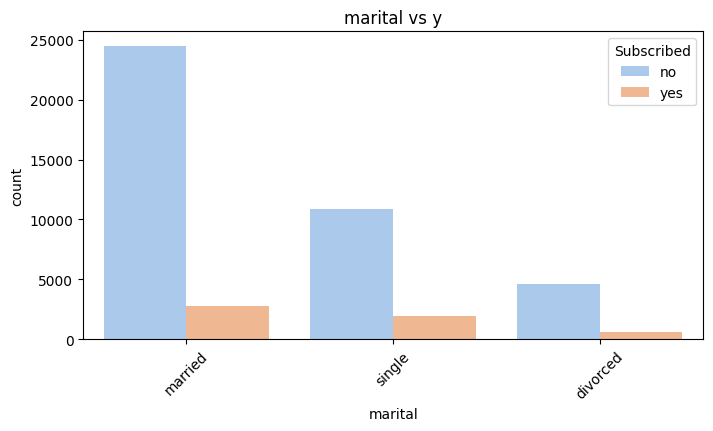

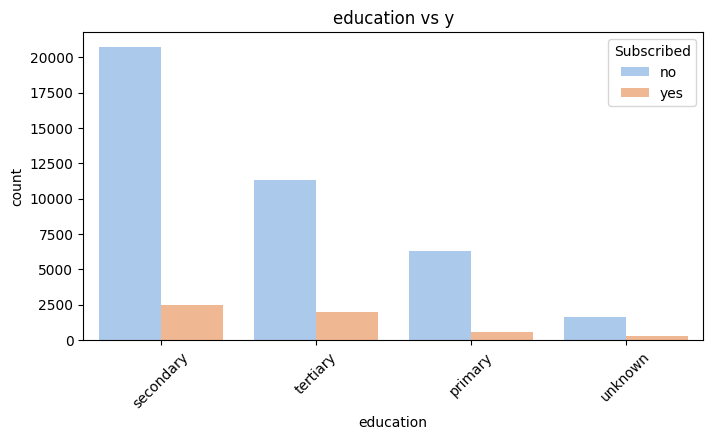

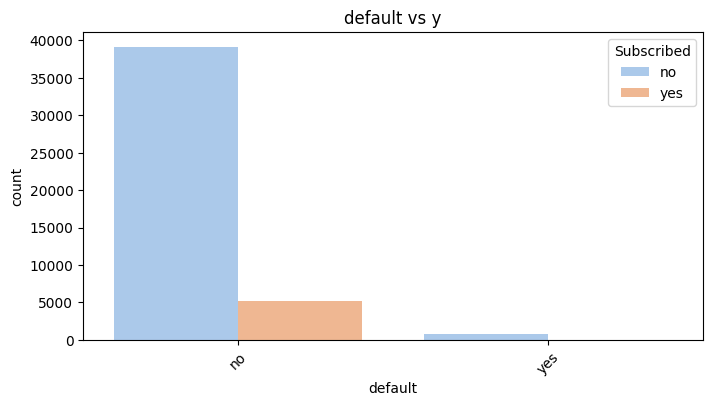

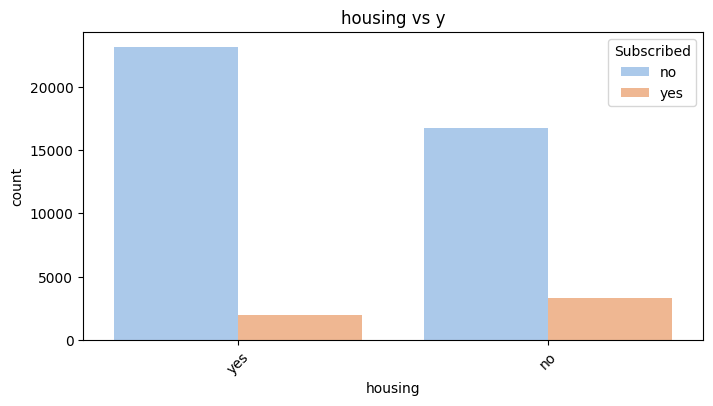

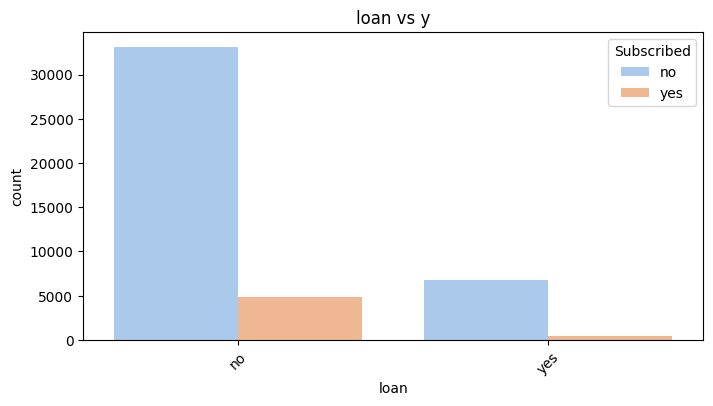

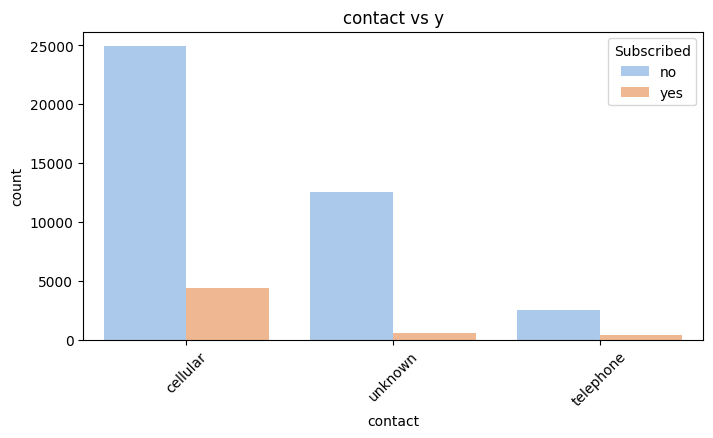

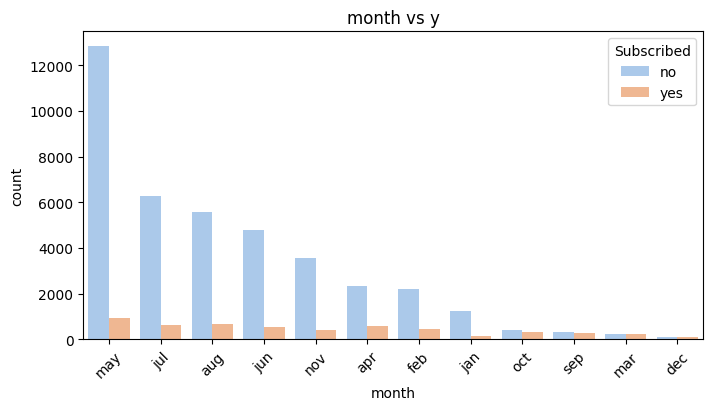

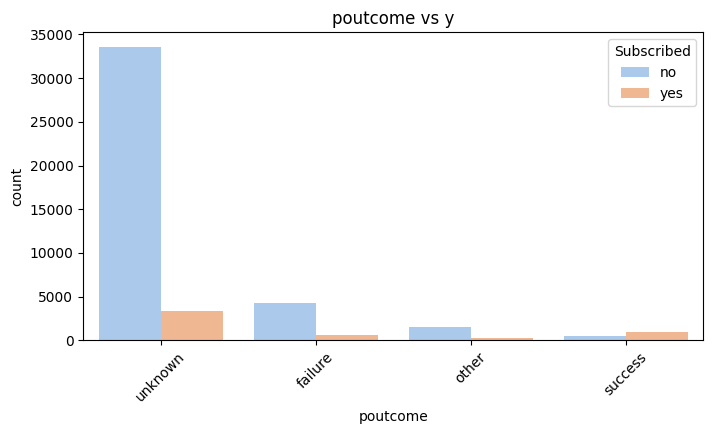

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\4211851189.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Subscribed")


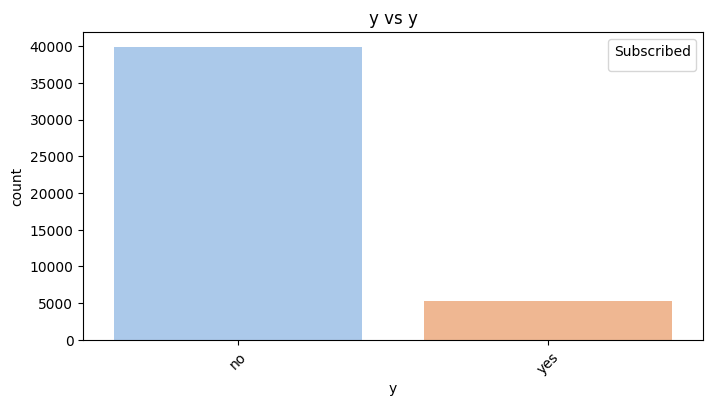

In [57]:
# Count plots for categorical variables vs target
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, hue=target_col, palette="pastel", order=data[col].value_counts().index)
    plt.title(f"{col} vs {target_col}")
    plt.xticks(rotation=45)
    plt.legend(title="Subscribed")
    plt.show()


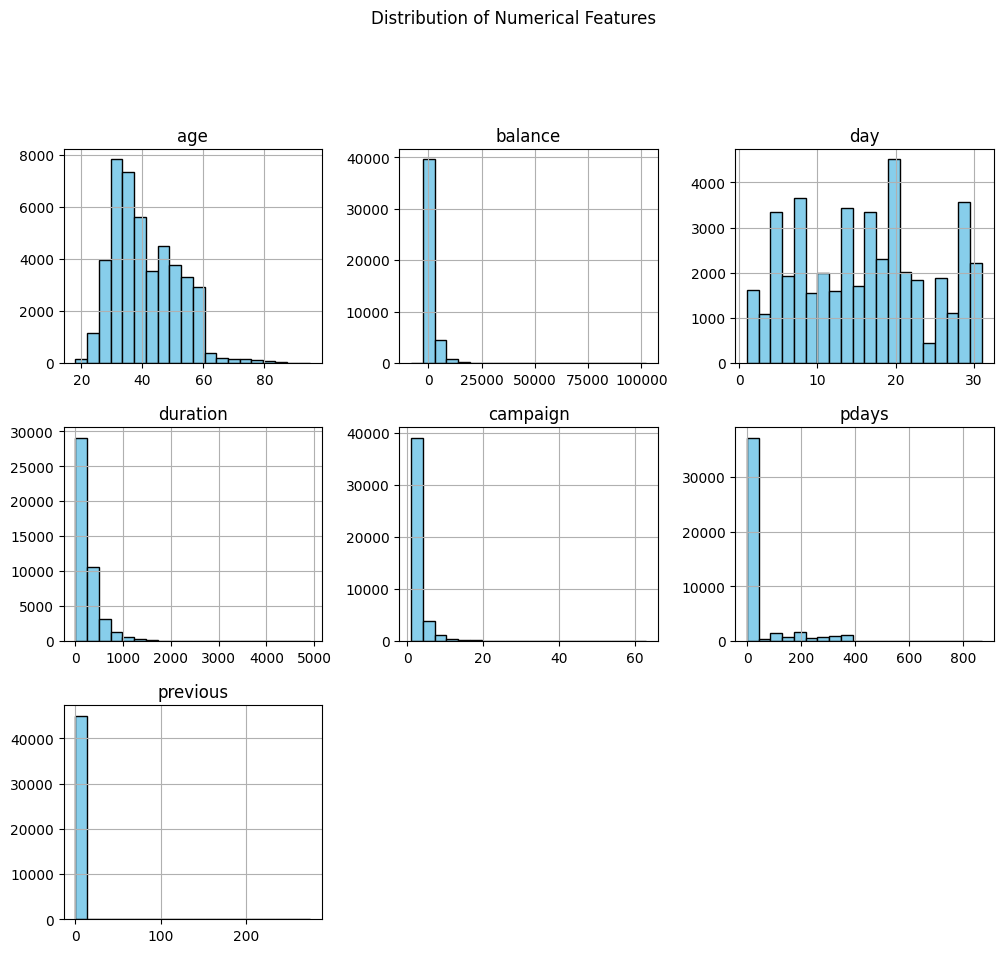

In [59]:
# Histograms for numerical variables
data[numerical_cols].hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", y=1.02)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\2956061266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target_col, y=col, palette="muted")


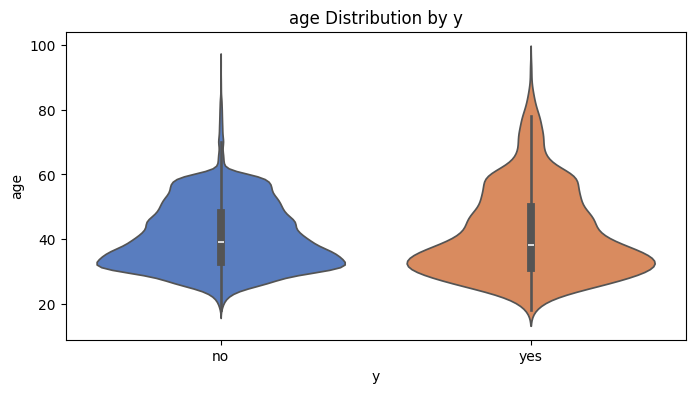

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\2956061266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target_col, y=col, palette="muted")


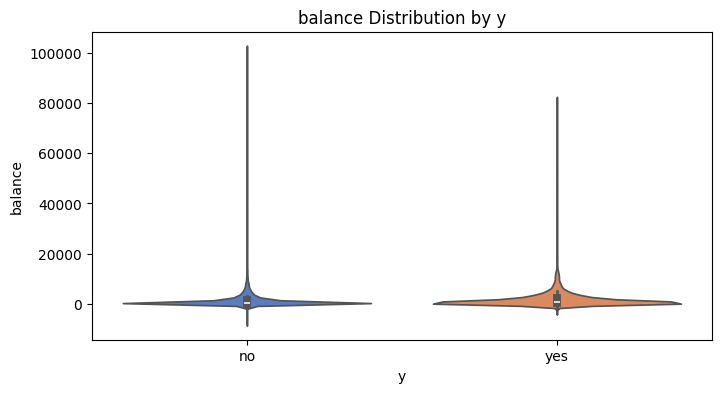

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\2956061266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target_col, y=col, palette="muted")


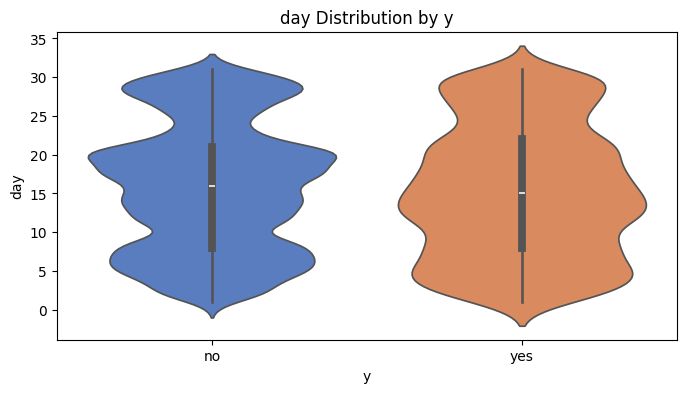

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\2956061266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target_col, y=col, palette="muted")


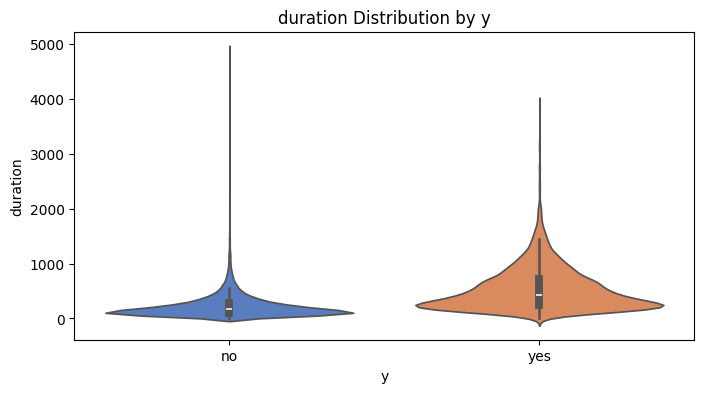

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\2956061266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target_col, y=col, palette="muted")


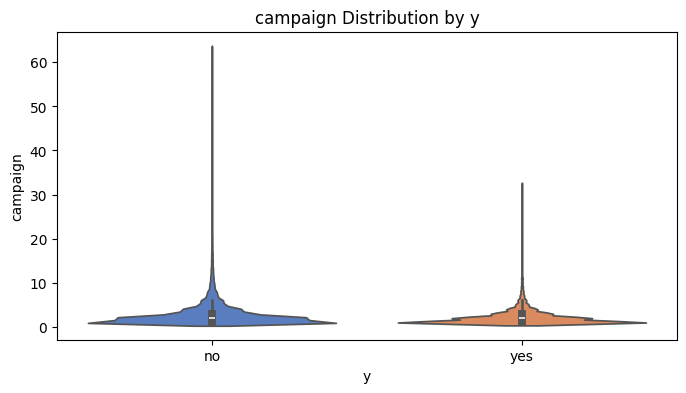

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\2956061266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target_col, y=col, palette="muted")


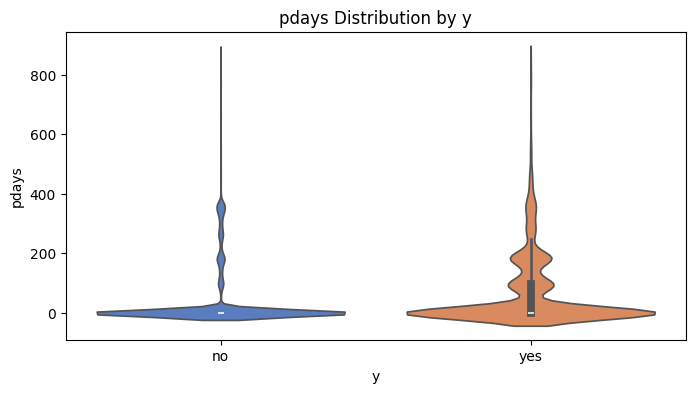

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\2956061266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target_col, y=col, palette="muted")


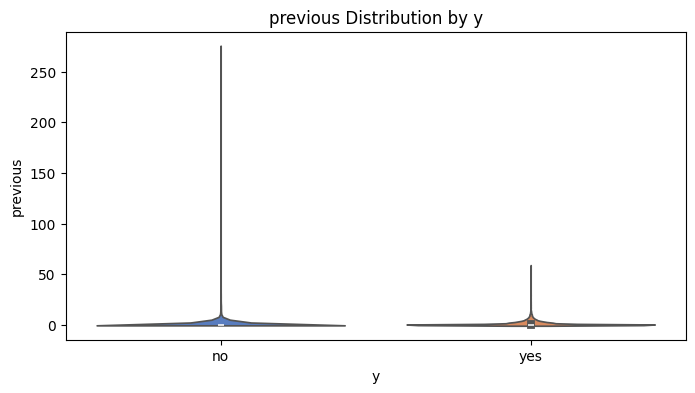

In [58]:
# Violin plots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.violinplot(data=data, x=target_col, y=col, palette="muted")
    plt.title(f"{col} Distribution by {target_col}")
    plt.show()


### Check for Inconsistencies

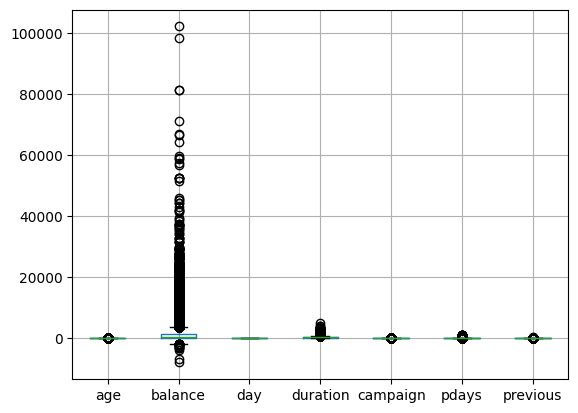

In [52]:
data.iloc[:,:].boxplot()
plt.show()

In [50]:
# Check for unique values in categorical columns
for col in categorical_cols:
    print(f"Unique Values in {col}: {data[col].unique()}")


Unique Values in job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique Values in marital: ['married' 'single' 'divorced']
Unique Values in education: ['tertiary' 'secondary' 'unknown' 'primary']
Unique Values in default: ['no' 'yes']
Unique Values in housing: ['yes' 'no']
Unique Values in loan: ['no' 'yes']
Unique Values in contact: ['unknown' 'cellular' 'telephone']
Unique Values in month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique Values in poutcome: ['unknown' 'failure' 'other' 'success']
Unique Values in y: ['no' 'yes']
